# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [3]:
#ваш код 
data = pd.read_csv("../data/Advertising.csv", index_col='Unnamed: 0')

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [4]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [5]:
data.head()
X = data.drop('sales', axis = 1)
y = data['sales']

X = X.to_numpy()
y= y.to_numpy()

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [6]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [7]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [8]:
num_iters = 1000
m = X.shape[0]
n = X.shape[1]
w = np.zeros((n, 1))

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = (sum((X @ w) - y) ** 2)/(len(y))

w

array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [9]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [48]:
data.head()
X = data.drop('sales', axis = 1)
y = data['sales']

X = X.to_numpy()
y= y.to_numpy()

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X = (X - means) / stds

**Добавим единичный столбец**

In [49]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [28]:
def mse_error(y, y_pred):
    # Вычисление MSE
    mse = np.mean((y - y_pred) ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [13]:
mean_sales = np.mean(y)
naive_predictions = np.full(y.shape, mean_sales)
mse_error(y, naive_predictions)

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [14]:
def lin_pred(X, w):
    return np.dot(X, w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [56]:
def stoch_grad_step(X, y, w, train_ind, eta=0.01):
    """_summary_

    Args:
        X (_array_): _матрица предикторов_
        y (_array_): _вектор ответов_
        w (_array_): _вектор весов_
        train_ind (_int _): _индекс объекта_
        eta (_float_): _шаг градиентного спуска_
    Returns:
        w_new(_array_): _обновленный вектор весов_
    """
    gradient = 2 * X[train_ind] * (np.dot(w, X[train_ind]) - y[train_ind]) / X.shape[0]
    w_new = w - gradient * eta
    return w_new


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [46]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, dist_min=1e-8):
    """_summary_

    Args:
        X (_array_): _матрица предикторов_
        y (_array_): _вектор ответов_
        w (_array_): _вектор весов_
        eta (_float _): _темп обучения_
        max_iter (_int_): _максимальное число итераций_
        dist_min (_float_): _eвклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу _
    Returns:
        w_new(_array_): _обновленный вектор весов_
        errors(_array_): вектор ошибок
    """
    dist = 1e+10 # расстояние между векторами
    errors = [] # список для фиксации ошибок 
    iters = 0 # счетчик итераций 
    while dist > dist_min and iters < max_iter:
        element = np.random.randint(X.shape[0]) # рандомный элемент 
        y_pred = lin_pred(X, w) # делаем предсказание с использованием готовой функции 
        errors.append(mse_error(y, y_pred)) # добавляем ошибку в список
        w_new = stoch_grad_step(X, y, w, element, eta) # пересчитываем веса
        dist = np.linalg.norm(w-w_new) # текущее расстояние между векторами весов 
        w = w_new
        iters+=1
        
    return w_new, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

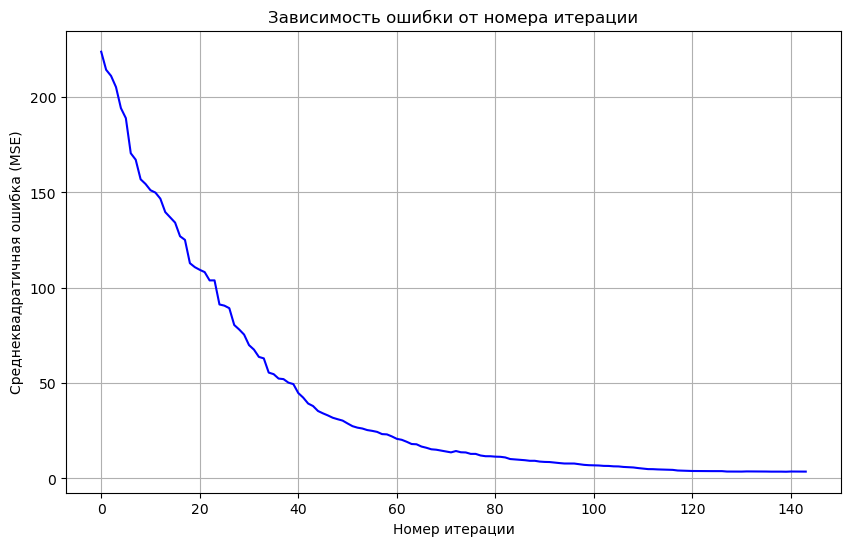

In [61]:
w_new, errors = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]), eta=2, max_iter=1e+5, dist_min=1e-3)
plt.figure(figsize=(10, 6))
plt.plot(errors, linestyle='-', color='b')
plt.xlabel('Номер итерации')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.title('Зависимость ошибки от номера итерации')
plt.grid(True)
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [64]:
print("Оптимальные веса:", w_new)

Оптимальные веса: [13.58401441  3.58575753  2.45821502  0.71353955]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [65]:
print("Среднеквадратичная ошибка на последней итерации:", errors[-1])

Среднеквадратичная ошибка на последней итерации: 3.5515024224951564


Cтохастический градиентный спуск нашел значения весов и минимизировал среднеквадратичную ошибку на заданном наборе данных.